# Question 1

Supposons qu'on lit le document numéro '422908' dans ma matrice. Appliquez l'algorithme Page rank pour déterminer les autres lectures recommandées. En plus de la simple recommandation des références de '422908', appliquez au moins une variation de cette approche de base, comme celle exposée en classe qui consiste à étendre le sous-ensemble S (références) à S' (références des références). Expliquez la démarche que vous avez prise.

Notre article:

422908
Title:
Symbolic Model Checking for Real-time Systems

Description:
. We describe finite-state programs over real-numbered time in a guardedcommandlanguage with real-valued clocks or, equivalently, as finite automata withreal-valued clocks. Model checking answers the question which states of a real-timeprogram satisfy a branching-time specification (given in an extension of CTL with clockvariables). We develop an algorithm that computes this set of states symbolically as afixpoint of a functional on state predicates, without constructing the state space.For this purpose, we introduce a -calculus on computation trees over real-numberedtime. Unfortunately, many standard program properties, such as response for allnonzeno execution sequences (during which time diverges), cannot be characterizedby fixpoints: we show that the expressiveness of the timed -calculus is incomparableto the expressiveness of timed CTL. Fortunately, this result does not impair thesymbolic verification of "implementable" real-time programs---those whose safety...

Authors:

Joseph Sifakis, Miniparc-zirst Rue Lavoisier, Sergio Yovine, Thomas A. Henzinger, Xavier Nicollin,

In [5]:
# Lecture de la base de données
m <- read.table('citeseer.rtable')
# Transformation de m en matrice pour effectuer les calculs
m <- as.matrix(m)
# On normalise les valeurs et on enleve les valeurs NaN
m <- m/colSums(m)
m[which(!is.finite(m))] <- 0
# Lecture de la fonction de Page Rank
# Si la division du vecteur de PR et le vecteur de nombre de lien sortant donne une valeur infini, on le met alors à 1 sur
# sur la dimension de la matrice
page <- function(mat,d,pr) {y <- pr/colSums(mat); y[which(!is.finite(y))] <- 1/dim(mat)[1]; (1-d)/dim(mat)[1] + (d * (mat %*% (y)))} 

In [6]:
# Lecture de la fonction pour trouver l'indice max
max.nindex <- function(m, n=5) {
    i <- order(m, decreasing=TRUE)
    return(i[1:n])
}

In [7]:
# Algorithme de Page Rank pour les recommandations les plus populaires
# On fait une nouvelle matrice avec S
m.temp <- m

d <- 0.85
pr <- rep(1,dim(m.temp)[1])
mm <- matrix(0, dim(m.temp)[1], 10)

for (i in 1:10) {pr <- page(m.temp,d,pr) ; mm[,i] <- pr} 
max.nindex(mm[,10],5)
# le numéro de l'article
rownames(m.temp)[max.nindex(mm[,10],5)]

[1] 865 443 518 158 640

[1] "500980" "259812" "297641" "14606"  "356801"

En premier, nous avons appliquer l'algorithme de Page Rank sur l'ensemble de la matrice m. 

50098
Title:
FunState - An Internal Design Representation for Codesign

Description:
In this paper, an internal design model called FunState (functions driven by state machines) is presented that enables the representation of different types of system components and scheduling mechanisms using a mixture of functional programming and state machines. It is shown how properties relevant for scheduling and verification of specification models such as Boolean dataflow, cyclostatic dataflow, synchronous dataflow, marked graphs, and communicating state machines as well as Petri nets can be represented in the FunState model of computation. Examples of methods suited for FunState are described, such as scheduling and verification. They are based on the representation of the model's state transitions in form of a periodic graph. The feasibility of the novel approach is shown with an ATM switch example.

Authors:

Dirk Ziegenbein, Jurgen Teich, Karsten Strehl, Lothar Thiele, Matthias Gries, Rolf Ernst, Student Member,

On voit que l'article n'est pas relier a notre article, il retourne seulement un article qui est tres cite et est cite par des articles tres cite aussi. En regardant sur google scholar, cet article est cite par 89articles ce qui est relativement beaucoup.

In [8]:
# Ajout de S' 

#Calcul de la matice de transition Sprime afin de determiner les chemins transitifs entre les noeuds par la puissance de la matrice
m2 <- m %*% m

In [9]:
# Déterminer les valeurs qui son associé au document recherché dans la matice S et S' les pages référencées par les pages de s
new.indice <- m['422908',]>0 | m2['422908',]>0
# Construire une nouvelle matrice qui contient tout les documents qui sont un lien direct ou transitif vers le doucment recherché
m.temp <- m+m2
m3 <- m.temp[new.indice,new.indice]

In [10]:
# Appliquer PR sur la matrice issue de S et S' en itérant 10 fois 
d <- 0.85
pr <- rep(1,dim(m3)[1])
mm2 <- matrix(0, dim(m3)[1], 10)
for (i in 1:10) {pr <- page(m3,d,pr) ; mm2[,i] <- pr} 
max.nindex(mm2[,10],5)

rownames(m3)[max.nindex(mm2[,10],5)]

[1] 17  2 20  3 22

[1] "3170"   "124"    "422908" "131548" "426325"

317
Title:
An Approach to the Description and Analysis of Hybrid Systems

Description:
IntroductionThe paper presents a model for hybrid systems, that is, systems that combine discreteand continuous components. Such systems are usually reactive real-time systemsused to control an environment evolving over time.A main assumption is that a run of a hybrid system is a sequence of two-phasesteps. The first phase of a step corresponds to a continuous state transformationusually described in terms of some parameter representing the time elapsed duringthis phase. In the second phase the state is submitted to a discrete change takingzero time.To illustrate this assumption, consider a temperature regulator commanding aheater so as to maintain the temperature ` of a room between two given bounds` min and ` max . A run of such a system is a sequence of steps determined by thealternating state changes of the heater from ON to OFF<F26.

Authors:

A. Olivero, J. Sifakis, S. Yovine, X. Nicollin,

Dans cet encore on parle encore de systeme en temps reel mais avec une approche hybride ce qui est une meilleur recommandation qu'avec le PR global.

# Question 2

Comparez les résultats obtenus avec une approche basée sur la similarité des articles dans un espace vectoriel, à l'instar du calcul de similarité de l'approche item-item. La mesure de la similarité et la façon de l'utiliser pour estimer la pertinence d'articles similaires est laissé à votre discrétion.

In [25]:
m = read.table("citeseer.rtable")
m <- as.matrix(m)
m.sparse <- m
m[m==0] <- NA
ST_id<-grep("422908", rownames(m))
ST_id

[1] 747

In [26]:
min.nindex <- function(m, n=5) {
    i <- order(m)
    return(i[1:n])
}
#Fonctions de cosinus 
cosinus.vm <- function(v,m) { 
    n <- sqrt(colSums(m^2)); 
    (v %*% m)/(n * sqrt(sum(v^2)))
}

In [27]:
m.center <- m
# on remplace les 0 par NA
m.center[m.center == 0] <- NA
# on calcule la distance eucledienne entre les documents
distance.na.450.center <- sqrt(colSums((m.center[,ST_id] - m.center)^2, na.rm=T)) # ignore les valeurs manquantes

# on calcule le nombre de votes communs 
votes.communs <- (colSums((m.sparse[,ST_id] * m.sparse) > 0))

# on assigne la valeur Inf au document qui ont moins de 1 votes communs avec le document original 
distance.na.450.center[votes.communs<1] <- Inf

# les documents les plus proches sont choisis
# on enlève le document original de la liste 
closest.euc <- min.nindex(distance.na.450.center, voisins)[-1]

# on calcule le cosinus entre les films choisis et star trek V
wcos.st <- cosinus.vm(m.sparse[,ST_id], m.sparse)

In [28]:
# Par approche item-item, le document X124 est recommandé avec la valeur de cosinus max
max.nindex(wcos.st,5)
colnames(wcos.st)[max.nindex(wcos.st,5)]

[1]  747 1081  858  755  889

[1] "X422908" "X96767"  "X496938" "X425638" "X522428"

In [ ]:
'X124' 'X136975' 'X131548' 'X10302' 'X147460'


In [39]:
voisins <- 21
min.nindex <- function(m, n=5) {
    i <- order(m)
    return(i[1:n])
}
cosinus.vm <- function(v,m) { 
    n <- sqrt(colSums(m^2)); 
    (v %*% m)/(n * sqrt(sum(v^2)))
}

# moyenne des votes par utilisateur
u.mean <-rowMeans(m.sparse)
# on centre la matrice pour enlever le biais des utilisateurs qui votent toujours haut ou en bas
m.center <- as.matrix((m.sparse-u.mean))

# on remplace les 0 par NA
m.center[m.center == 0] <- NA
# on calcule la distance eucledienne entre les films
distance.na.450.center <- sqrt(colSums((m.center[,ST_id] - m.center)^2, na.rm=T)) # ignore les valeurs manquantes


# on calcule le nombre de votes communs des films avec star trek V
votes.communs <- (colSums((m.sparse[,ST_id] * m.sparse) > 0))

# on assigne la valeur Inf au film qui ont moins de 10 votes communs avec star trek V
# on filtre donc pour avoir 10 ou plus votes communs
distance.na.450.center[votes.communs<1] <- Inf

# les films les plus proches sont choisis (les 20 plus proches)
# on enlève Star Trek V encore une fois
closest.euc <- min.nindex(distance.na.450.center, voisins)[-1]
# on calcule le cosinus entre les films choisis et star trek V
wcos.st <- cosinus.vm(m.sparse[,ST_id], m.sparse[,closest.euc])
wcos.st

# les 20 films les plus communs
idx<- closest.euc
# on transpose m
m.sparse.t <- m.sparse
# la range de l item de star trek V
v.item <- m.sparse[ST_id,]
# la moyenne de l item de star trek V
v_1 <-mean(v.item);
# retourne la moyenne pour chacun des 20 films voisisns
v_i <- apply(m.sparse[idx,], 1, FUN=mean)

x<- as.matrix((m.sparse[idx,]))

# retourne un liste ayant comme element chaque colonne de x
new_x <-lapply(seq_len(ncol(x)), function(i) x[,i])
# retourne un liste ayant comme element la moyenne des 20 films voisins
new_y <-as.vector(lapply(seq_len(ncol(x)), function(i) v_i)) 
# retourne un liste ayant comme element les poids(cosinus) des 20 films voisins
new_w <-as.vector(lapply(seq_len(ncol(x)), function(i) as.matrix(wcos.st)))
#prend seulement ceux qui n'ont de cote 
# Fonction qui détermine la prédiction des valeurs manquants à l'aide de l'algorithme user-user ou item-item                        
predict_func <- function(x,y,w) {
    x.temp <- (x-y);
    num <-  w %*%x.temp;
    denum <- sum(abs(t(w)));
    num/denum} 

c_prod <- mapply(predict_func ,new_x, new_y, new_w)

                         
# Ajoute la moeynne de l'item pour la note finale des items
prediction <- v_1 + c_prod
# on retourne les resultats qui n'avaient pas de prediction
results <- prediction
max.nindex(results,5)                       
colnames(m)[max.nindex(results,10) ]
min(results)
v_1

149673,466838,70445,96767,155792,497542,53632,147460,149505,17094,225173,22638,227057,230245,3175,426325,8434,10563,114285,119041
0.4850713,0.4850713,0.4950738,0.5144958,0.4583492,0.4338609,0.4583492,0.396059,0.3429972,0.396059,0.3429972,0.396059,0.3429972,0.3638034,0.4287465,0.396059,0.396059,0.2425356,0.280056,0.2425356


[1] 747 961 985 246 232

[1] "X422908" "X64835"  "X70445"  "X177173" "X17094"  "X426325" "X3950"  
 [8] "X155792" "X22638"  "X3175"

[1] 0.03489936

[1] 0.04220183

Dans 5 des 6premieres recommandations meme auteur

124
Title:
Hybrid Automata: An Algorithmic Approach to the Specification and Verification of Hybrid Systems

Description:
We introduce the framework of hybrid automata as a model and specification language forhybrid systems. Hybrid automata can be viewed as a generalization of timed automata, in whichthe behavior of variables is governed in each state by a set of differential equations. We show thatmany of the examples considered in the workshop can be defined by hybrid automata. Whilethe reachability problem is undecidable even for very restricted classes of hybrid automata, wepresent two semidecision procedures for verifying safety properties of piecewise-linear hybridautomata, in which all variables change at constant rates. The two procedures are based,respectively, on minimizing and computing fixpoints on generally infinite state spaces. We showthat if the procedures terminate, then they give correct answers. We then demonstrate thatfor many of the typical workshop examples, the procedures do terminate and thus provide anautomatic way for verifying their properties.1 IntroductionMore and...

Authors:

Costas Courcoubetis, Pei-hsin Ho, Rajeev Alur, Thomas A. Henzinger,

Comme pour la première référence, l'article parle d'approche hybride. c'est aussi intéressant de voir que la recommendation de l'approche I-I est la deuxième proposée par l'approche page rank. C'est donc une référence de notre article de base.

125089
Title:
Timing Analysis of Industrial Real-Time Systems

Description:
In this paper, we describe a formal method for modellingreal-time systems and a procedure to compute themodel's timing characteristics automatically. We presentalgorithms that compute exact bounds on the delay betweentwo specified events. We also describe an algorithmto count the minimum and maximum number of times anevent occurs between a given starting condition and anending condition. These algorithms are based on symbolicmodel checking techniques [6, 24] which have been successfullyused to find bugs in several industrial designs.Such techniques can be used to search exhaustively statespaces with up to 1030states. To illustrate the usefulness ofour method, we describe the timing analysis for a patientmonitoring system with more than 1013states. We alsopresent the timing analysis and verification for an aircraftcontroller. The sizes of the examples we verify demonstratethat our tool can be applied to realistic industrial designs.1 IntroductionSymbolicmodel...

Authors:

E. Clarke, M. Minea, S. Campos, W. Marrero,

En regardant le deuxième article qui n'est pas une source de notre recommandation, il semble être une meilleure recommandation pour une personne qui recherche sur le sujet de notre article de départ, car il parle lui aussi de système temps réel.

Recommandation:

Page rank global:'500980' '259812' '297641' '14606' '356801'

Page rank (S'):'3170' '124' '422908' '131548' '426325'

I-I: '124' '125089' '114285' '126858' '10563'

On remarque aussi que la recommandation de page rank(S) est dans les recommandation de page rank (S'). De plus, ils ont la même 5e recommadation. Et comme on avait indiqué plus tôt la première de I-I est la même que celle de page rank(S). Les recommandations sont donc semblable pour toutes les approches. Pour avoir des articles plus récent que l'article de départ, l'approche I-I est bonne, pour page rank il faudrait inclure dans (S') des articles qui référence notre article ou ces sources. Inclure les références ainsi que les références des références retourne seulement des articles plus vieux. 

# Question 3

Utilisez une validation croisée pour évaluer la performance de l'approche item-item. Vous pouvez vous inspirer de l'approche utilisée dans l'article suivant pour la méthodologie à adopter. 

In [30]:
# Lecture de la fonction pour déterminer la matrice de Cosinus de m 
matrix.cos <- function(m) {
    (m %*% t(m)) / ( t(matrix(sqrt(rowSums(m^2)),nrow(m),nrow(m)))
                   * (sqrt(rowSums(m^2))) )
}

In [36]:
m <- read.table('citeseer.rtable')
m <- as.matrix(m)
# On met le diagonal de la matrice m à ≈ 0 puisque un article ne peut pas se référencer lui-même
# La raison de pas mettre la diagonale à 0 est pour évitre la division par 0 
diag(m)<- 0.0001
m[m==0] <- 0
indice <- which(m == max(m), arr.ind = TRUE);
# Resample la matrice m 
set.seed(3)
dim(indice)
indice<-indice[sample(2821),]
blop <- rep(10,0)
blop2 <- rep(10,0)
mat.cos <- matrix.cos(m)
for (i in 1:10) {
# On détermine les documents référencé dans la matrice
temp <- m ;
# On met à -1 le docuement pour effectuer la validation croisée
temp[indice[i,1],indice[i,2]] <- 0;
# On calcul ensuite la valeur de cosinus pour les n documents référencés
blop[i]<-mat.cos[indice[i,1],indice[i,2]]
blop2[i]<-matrix.cos(temp)[indice[i,1],indice[i,2]]
    }

[1] 2821    2

In [37]:
blop

[1] 3.254065e-01 7.071068e-01 3.333667e-01 2.041241e-05 2.236292e-01
 [6] 2.357023e-05 1.290994e-05 1.825924e-01 5.000000e-01 7.071068e-01

In [38]:
blop2

[1] 0.3354102 0.0000000 0.3535534 0.0000000 0.2357023 0.0000000 0.0000000
 [8] 0.1924501 0.0000000 0.0000000

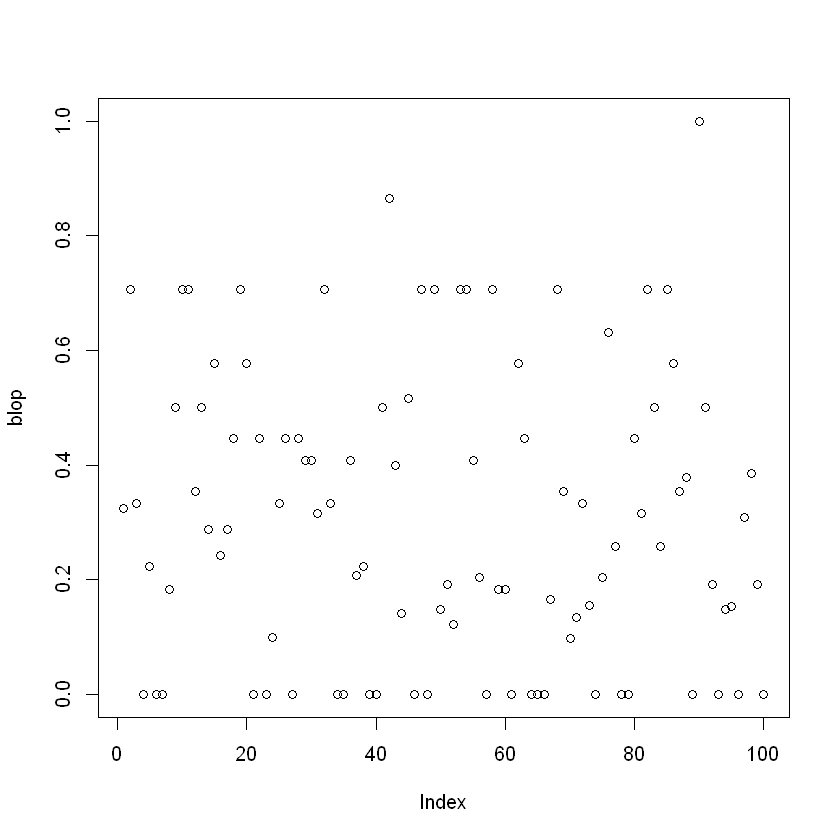

In [23]:
plot(blop)

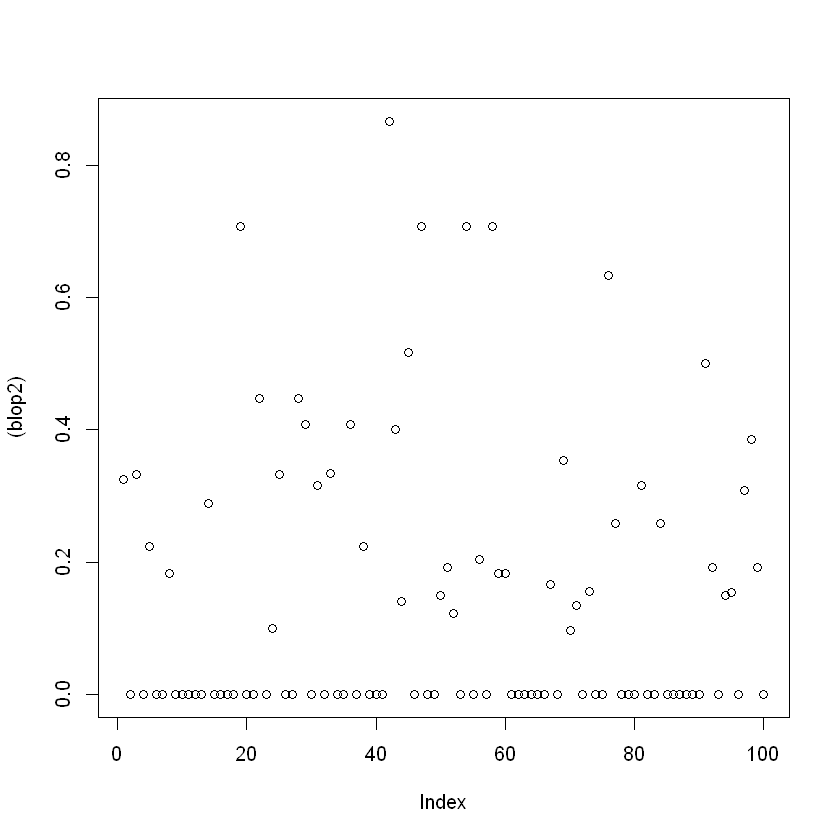

In [28]:
plot((blop2))